<a href="https://colab.research.google.com/github/WandersonClayton/data_analysis/blob/main/Comparando_diferentes_tecnicas_de_amostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#F24405">Comparando Diferentes Técnicas de Amostragem</font>
<hr color="#0CABA8" size="1">

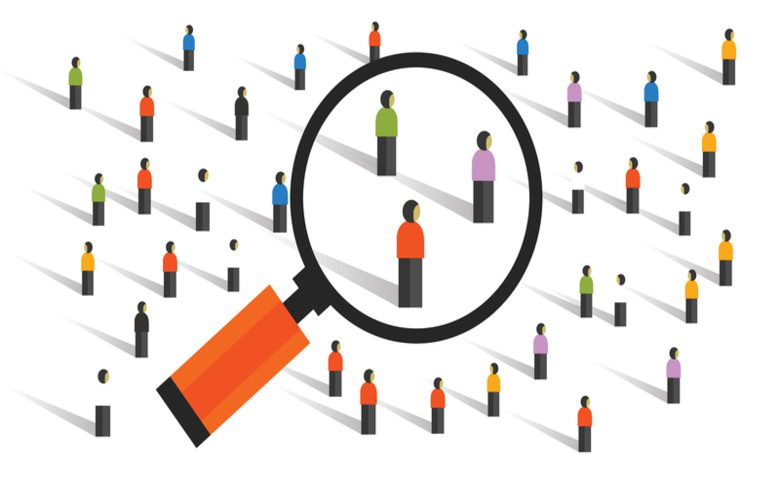

**Por: [Wanderson Clayton](https://www.linkedin.com/in/wandersonclayton3/)**

<span>
  <a href="https://api.whatsapp.com/send?phone=5534998771247">
    <img src="https://img.icons8.com/material-outlined/24/000000/whatsapp.png"/>
  </a>
  <a href="https://www.linkedin.com/in/wandersonclayton3">
    <img src="https://img.icons8.com/material-outlined/24/000000/linkedin.png"/>
  </a>
  <a href="https://github.com/WandersonClayton">
    <img src="https://img.icons8.com/material-outlined/24/000000/github.png"/>
  </a>
</span>

<hr color="#F5F5F5" size="2">

Este notebook tem como objetico comparar diferentes tecnicas de amostragem, dentre elas:

<div style="color: rgb(0, 0, 0);">→ Amostragem Simples</div>
<div style="color: rgb(0, 0, 0);">→ Amostragem Sistemática</div>
<div style="color: rgb(0, 0, 0);">→ Amostragem Por Grupos</div>
<div style="color: rgb(0, 0, 0);">→ Amostragem Extratificada</div>
<div style="color: rgb(0, 0, 0);">→ Amostragem De Reservatório</div>
</div>

<a id='descricao-variaveis'></a>
### <font color="#F24405"> Descrição das Variáveis do Dataset</font>
<hr color="#F5F5F5" size="1">

| Variável | Descrição |
| --- | --- |
| **i#clientid** | Identificador único para cada cliente |
| **income** | Renda do Cliente |
| **age** | Idade do Cliente
| **loan** | Valor do Emprestimo |
| **c#default** | 0 - se o cliente pagou; 1 - Se não pagou |

<a id='install-pack'></a>
# <font color="#FA7F08"> 2. Instalação e carregamento de pacotes </font>
<hr color="#F5F5F5" size="1">

In [11]:
#Pack para manipular dados
import numpy as np
import pandas as pd

#Pack para visulização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
import random
from scipy.stats import normaltest
from scipy.stats import chi2_contingency


# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedShuffleSplit
#import category_encoders as ce

#Pck para ignorar Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

print('import de pack - ok!')



import de pack - ok!


In [12]:
# Versões dos pacotes usados neste notebook
#!pip install -q -U watermark
%reload_ext watermark
%watermark -a "Wanderson Clayton - @wandersonclayton3" --iversions

Author: Wanderson Clayton - @wandersonclayton3

matplotlib: 3.7.1
sys       : 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
pandas    : 1.5.3
seaborn   : 0.12.2
plotly    : 5.15.0
scipy     : 1.10.1
numpy     : 1.23.5
missingno : 0.5.2




    
<a id='conhecendo_dados'></a>
# <font color="#FA7F08"> 3. Carregando e conhecendo dados </font>
<hr color="#F5F5F5" size="1">

In [13]:
df = pd.read_csv('/content/credit_data.csv')

In [14]:
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [15]:
df.tail()

,i#clientid,income,age,loan,c#default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [16]:
df.shape

(2000, 5)

Para todas as tecnincas defina uma amostra de 20% da população.

In [17]:
tamanho_amostra = int(0.10*(len(df)))
tamanho_populacao = int(len(df))
valor_max = len(df)
valor_min = 0

<a id='amostragem'></a>
# <font color="#FA7F08"> 4. Amostragem de dados </font>
<hr color="#F5F5F5" size="1">

Amostragem de dados é uma técnica utilizada em estatística e análise de dados para selecionar uma parte representativa de um conjunto maior de dados, chamado de população, a fim de realizar análises e inferências sobre essa população sem a necessidade de examinar todos os elementos. A amostragem é uma abordagem prática e eficiente para lidar com conjuntos de dados extensos, uma vez que torna possível tirar conclusões a partir de uma fração dos dados, economizando tempo, recursos e esforços.

1.   Item de lista
2.   Item de lista





### <font color="#FA7F08"> 4.1. Amostragem Simples </font>
<hr color="#F5F5F5" size="1">

Nesse método, selecionamos aleatoriamente uma parte, ou amostra, da população e examinamos essa amostra com o objetivo de obter insights e conclusões que possam ser generalizados para toda a população. A chave aqui é garantir que a amostra seja selecionada de forma aleatória e imparcial, para que seja verdadeiramente representativa.

In [18]:


def amostra_simples(lista, tamanho_amostra, valor_min, valor_max):
    seed = 42
    random.seed(seed)

    # Generate a list of unique random numbers within the specified range
    unique_random_numbers = random.sample(range(valor_min, valor_max + 1), tamanho_amostra)

    lista.extend(unique_random_numbers)


simple_sample_list = []

amostra_simples(simple_sample_list, tamanho_amostra, valor_min, valor_max)
simple_sample_list.sort()


* Cria uma função
* Gere um número aleatório unico que estão entre o limite superio e inferior, ou seja, 0 a 1999 (quantidade de linhas do dataset)
* Cria uma lista vazia e use a função criada para preencher-la com numeros aleatório gerados.
* Ordena a lista de em ordem ascendente
* Use o iloc para filtrar o dataset original, afim de se obter apenas a linhas selecionadas aleatoriamente.

In [19]:
amostragem_simples = df.iloc[simple_sample_list]

In [20]:
amostragem_simples.head()

,i#clientid,income,age,loan,c#default
6,7,48430.359613,26.809132,5722.581981,0
13,14,27267.995458,61.576776,4759.787581,0
23,24,27845.800894,51.970624,4959.921226,0
51,52,57596.354098,29.246057,3344.384401,0
54,55,24912.842682,49.366371,267.696299,0


In [21]:
amostragem_simples.shape

(200, 5)


### <font color="#FA7F08"> 4.2. Amostragem Sistemática </font>
<hr color="#F5F5F5" size="1">

A amostragem sistemática é uma técnica onde elementos são selecionados de uma população seguindo um padrão fixo, após um ponto de partida aleatório. Essa abordagem é útil quando a população tem ordem, sendo mais eficiente que a amostragem aleatória simples, mas é importante evitar padrões que possam introduzir viés na amostra.

In [22]:
#Primeiramente temos que selecionar um número de partida que é um numero
# aleatorio entre 0 e (tamanho populacao/tamanho amostra)

#Escolhendo o numero da semente
np.random.seed(39)

num_partida = np.random.randint(0, (len(df)/tamanho_amostra),1)
print(num_partida)

[9]


In [23]:
list_systematic_sampling = []

for i in range(tamanho_amostra):
    value = num_partida + i*(len(df)/tamanho_amostra)
    list_systematic_sampling.append(int(value))


#print(list_systematic_sampling)



In [24]:
amostragem_sistematica = df.iloc[list_systematic_sampling]
amostragem_sistematica.head()

,i#clientid,income,age,loan,c#default
9,10,25075.872771,39.776378,1409.230371,0
19,20,58887.357549,26.076093,4965.516066,0
29,30,58842.891308,54.510948,10871.186790,0
39,40,26578.536693,32.676044,3489.843136,1
49,50,68427.163111,46.308240,1658.070233,0


In [25]:
amostragem_sistematica.tail()

,i#clientid,income,age,loan,c#default
1959,1960,38755.162705,56.355427,4244.498033,0
1969,1970,56441.016244,43.206991,9043.756044,0
1979,1980,33702.531834,48.148404,922.036590,0
1989,1990,43662.092688,25.252609,7269.596897,1
1999,2000,69436.579552,56.152617,7378.833599,0


In [26]:
amostragem_sistematica.shape

(200, 5)



### <font color="#FA7F08"> 4.3. Amostragem Por Grupos </font>
<hr color="#F5F5F5" size="1">

In [27]:
qtd_grupos = int(tamanho_populacao/tamanho_amostra)


np.random.seed(25)

escolha_grupo = np.random.randint(0, qtd_grupos,1)


list_sampling_by_group = []

for i in range(tamanho_amostra):
    value = escolha_grupo*tamanho_amostra + i
    list_sampling_by_group.append(int(value))


#print(list_sampling_by_group)




In [28]:
amostragem_por_grupo = df.iloc[list_sampling_by_group]
amostragem_por_grupo.head()

,i#clientid,income,age,loan,c#default
800,801,22869.323455,25.906445,527.551568,0
801,802,60113.342542,40.774306,8253.384569,0
802,803,23613.255685,32.473506,2469.234585,0
803,804,68755.094421,53.228132,10990.533753,0
804,805,26449.328293,46.479153,2952.123152,0


In [29]:
amostragem_por_grupo.tail()

,i#clientid,income,age,loan,c#default
995,996,21593.622658,51.548923,458.093724,0
996,997,49104.768240,35.538517,9452.217947,0
997,998,65776.232413,39.798191,2805.863745,0
998,999,36192.149452,21.402403,7236.173930,1
999,1000,62165.861186,19.602543,4739.948954,0


In [30]:
amostragem_por_grupo.shape

(200, 5)




### <font color="#FA7F08"> 4.4. Amostragem Extratificada </font>
<hr color="#F5F5F5" size="1">

In [31]:
target = df['c#default']
features = df.drop('c#default', axis=1)
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

train, list_stratified_sampling = next(stratified_split.split(features,target))
list_stratified_sampling.sort()
#print(list_stratified_sampling)

In [32]:
amostragem_estratificada = df.iloc[list_stratified_sampling]
amostragem_estratificada.head()

,i#clientid,income,age,loan,c#default
15,16,50501.726689,-28.218361,3977.287432,0
16,17,43548.654711,39.574530,3935.544453,0
22,23,23329.319414,48.576975,222.622299,0
23,24,27845.800894,51.970624,4959.921226,0
36,37,25952.381471,58.185017,2109.200772,0


In [33]:
amostragem_estratificada.tail()

,i#clientid,income,age,loan,c#default
1947,1948,59299.162722,36.984277,4944.056264,0
1962,1963,35108.557953,40.743413,4002.991276,0
1967,1968,45576.838362,38.671050,4952.653346,0
1968,1969,55068.668937,51.757360,4852.766598,0
1995,1996,59221.044874,48.518179,1926.729397,0


In [34]:
amostragem_estratificada.shape

(200, 5)




### <font color="#FA7F08"> 4.5. Amostragem de Reservatório </font>
<hr color="#F5F5F5" size="1">

In [35]:

def reservoir_sampling(data_stream, tamanho_amostra):
    stream = []

    for i in range(len(data_stream)):
      stream.append(i)

    i = 0
    reservoir = [0]*tamanho_amostra

    for i in range(tamanho_amostra):
      reservoir[i] = stream[i]

    while i < len(data_stream):
      j = random.randrange(i+1)
      if j < tamanho_amostra:
        reservoir[j] = stream[i]
        i += 1



    return reservoir



list_sampling_reservoir = reservoir_sampling(df, tamanho_amostra)
list_sampling_reservoir.sort()
#print(list_sampling_reservoir)


In [36]:
amostragem_reservatorio = df.iloc[list_sampling_reservoir]

In [37]:
amostragem_reservatorio.head()

,i#clientid,income,age,loan,c#default
1288,1289,30884.056729,31.277862,4099.902045,1
1298,1299,27407.056203,26.159438,2949.931674,0
1302,1303,41581.889922,22.851221,7895.112865,1
1322,1323,39992.719113,20.826680,4999.202015,1
1344,1345,33084.169850,59.029102,5762.469958,0


In [38]:
amostragem_reservatorio.tail()

,i#clientid,income,age,loan,c#default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [39]:
amostragem_reservatorio.shape

(200, 5)

<a id='erro'></a>
# <font color="#FA7F08"> 5. Análise de erro </font>
<hr color="#F5F5F5" size="1">




### <font color="#FA7F08"> 5.1. Gerando tabela de resultados </font>
<hr color="#F5F5F5" size="1">

In [40]:
dados_resultado = {
    'Tecnica-Amostragem': ['df-Original','Simples', 'Sistematica', 'Por Grupos', 'Extratificada', 'Reservatorio']
}

In [41]:
df_resultado = pd.DataFrame(dados_resultado)

In [42]:
df_resultado.head(6)

,Tecnica-Amostragem
0,df-Original
1,Simples
2,Sistematica
3,Por Grupos
4,Extratificada
5,Reservatorio


In [43]:


df_resultado['media-income'] = [df['income'].mean(),
                                amostragem_simples['income'].mean(),
                                amostragem_sistematica['income'].mean(),
                                amostragem_por_grupo['income'].mean(),
                                amostragem_estratificada['income'].mean(),
                                amostragem_reservatorio['income'].mean()]

In [44]:
df_resultado['mediana-income'] = [df['income'].median(),
                                amostragem_simples['income'].median(),
                                amostragem_sistematica['income'].median(),
                                amostragem_por_grupo['income'].median(),
                                amostragem_estratificada['income'].median(),
                                amostragem_reservatorio['income'].median()]

In [45]:
df_resultado['media-age'] =    [df['age'].mean(),
                                amostragem_simples['age'].mean(),
                                amostragem_sistematica['age'].mean(),
                                amostragem_por_grupo['age'].mean(),
                                amostragem_estratificada['age'].mean(),
                                amostragem_reservatorio['age'].mean()]

In [46]:
df_resultado['mediana-age'] =    [df['age'].median(),
                                amostragem_simples['age'].median(),
                                amostragem_sistematica['age'].median(),
                                amostragem_por_grupo['age'].median(),
                                amostragem_estratificada['age'].median(),
                                amostragem_reservatorio['age'].median()]

In [47]:
df_resultado['media-loan'] =    [df['loan'].mean(),
                                amostragem_simples['loan'].mean(),
                                amostragem_sistematica['loan'].mean(),
                                amostragem_por_grupo['loan'].mean(),
                                amostragem_estratificada['loan'].mean(),
                                amostragem_reservatorio['loan'].mean()]

In [48]:
df_resultado['mediana-loan'] =    [df['loan'].median(),
                                amostragem_simples['loan'].median(),
                                amostragem_sistematica['loan'].median(),
                                amostragem_por_grupo['loan'].median(),
                                amostragem_estratificada['loan'].median(),
                                amostragem_reservatorio['loan'].median()]

In [49]:
df_resultado['c#default-0'] = [(df['c#default']== 0).sum(),
                                (amostragem_simples['c#default']== 0).sum(),
                                (amostragem_sistematica['c#default']== 0).sum(),
                                (amostragem_por_grupo['c#default']== 0).sum(),
                                (amostragem_estratificada['c#default']== 0).sum(),
                                (amostragem_reservatorio['c#default']== 0).sum()]

In [50]:
df_resultado['c#default-1'] = [(df['c#default']== 1).sum(),
                                (amostragem_simples['c#default']== 1).sum(),
                                (amostragem_sistematica['c#default']== 1).sum(),
                                (amostragem_por_grupo['c#default']== 1).sum(),
                                (amostragem_estratificada['c#default']== 1).sum(),
                                (amostragem_reservatorio['c#default']== 1).sum()]

In [51]:
df_resultado['c#default-0-perct'] = 0.0

for i in range(len(df_resultado)):
  df_resultado['c#default-0-perct'][i] = df_resultado['c#default-0'][i]/ (df_resultado['c#default-0'][i]+df_resultado['c#default-1'][i])


<ipython-input-51-087082465ab4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultado['c#default-0-perct'][i] = df_resultado['c#default-0'][i]/ (df_resultado['c#default-0'][i]+df_resultado['c#default-1'][i])


In [52]:
df_resultado['c#default-1-perct'] = 0.0

for i in range(len(df_resultado)):
  df_resultado['c#default-1-perct'][i] = df_resultado['c#default-1'][i]/ (df_resultado['c#default-0'][i]+df_resultado['c#default-1'][i])


<ipython-input-52-c74e10fd56e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultado['c#default-1-perct'][i] = df_resultado['c#default-1'][i]/ (df_resultado['c#default-0'][i]+df_resultado['c#default-1'][i])


In [53]:
#df_resultado = df_resultado.drop('c#default-0-perct', axis=1)


In [54]:
df_resultado.head(6)

,Tecnica-Amostragem,media-income,mediana-income,media-age,mediana-age,media-loan,mediana-loan,c#default-0,c#default-1,c#default-0-perct,c#default-1-perct
0,df-Original,45331.600018,45789.117313,40.807559,41.317159,4444.369695,3974.719419,1717,283,0.8585,0.1415
1,Simples,47244.191239,48382.373694,38.468535,36.557742,4628.755282,3990.836932,171,29,0.8550,0.1450
2,Sistematica,44950.243115,46009.334682,41.191635,41.473717,4623.260109,4145.749304,174,26,0.8700,0.1300
3,Por Grupos,45775.958984,46586.373959,39.868903,39.477749,4241.077468,3710.103866,170,30,0.8500,0.1500
4,Extratificada,44226.020049,45056.265591,40.790806,41.068257,4448.662229,4112.378087,172,28,0.8600,0.1400
5,Reservatorio,45960.442733,46434.890984,41.103571,41.147699,4639.680267,4254.835869,175,25,0.8750,0.1250





### <font color="#FA7F08"> 5.2. Gerando tabela de erros </font>
<hr color="#F5F5F5" size="1">

In [55]:
df_erro = pd.DataFrame(dados_resultado)

In [56]:
df_erro.head(6)

,Tecnica-Amostragem
0,df-Original
1,Simples
2,Sistematica
3,Por Grupos
4,Extratificada
5,Reservatorio


In [57]:
df_erro['media-income-erro'] = 0.0

for i in range(len(df_resultado)):
  df_erro['media-income-erro'][i] = df_resultado['media-income'][0] - df_resultado['media-income'][i]


<ipython-input-57-3ad61db59b39>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erro['media-income-erro'][i] = df_resultado['media-income'][0] - df_resultado['media-income'][i]


In [58]:
df_erro['mediana-income-erro'] = 0.0

for i in range(len(df_resultado)):
  df_erro['mediana-income-erro'][i] = df_resultado['mediana-income'][0] - df_resultado['mediana-income'][i]


<ipython-input-58-5097819f4115>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erro['mediana-income-erro'][i] = df_resultado['mediana-income'][0] - df_resultado['mediana-income'][i]


In [59]:
df_erro['media-age-erro'] = 0.0

for i in range(len(df_resultado)):
  df_erro['media-age-erro'][i] = df_resultado['media-age'][0] - df_resultado['media-age'][i]

<ipython-input-59-ace964d18e38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erro['media-age-erro'][i] = df_resultado['media-age'][0] - df_resultado['media-age'][i]


In [60]:
df_erro['mediana-age-erro'] = 0.0

for i in range(len(df_resultado)):
  df_erro['mediana-age-erro'][i] = df_resultado['mediana-age'][0] - df_resultado['mediana-age'][i]

<ipython-input-60-b91b0bb74900>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erro['mediana-age-erro'][i] = df_resultado['mediana-age'][0] - df_resultado['mediana-age'][i]


In [61]:
df_erro['media-loan-erro'] = 0.0

for i in range(len(df_resultado)):
  df_erro['media-loan-erro'][i] = df_resultado['media-loan'][0] - df_resultado['media-loan'][i]

<ipython-input-61-d06547b4e009>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erro['media-loan-erro'][i] = df_resultado['media-loan'][0] - df_resultado['media-loan'][i]


In [62]:
df_erro['mediana-loan-erro'] = 0.0

for i in range(len(df_resultado)):
  df_erro['mediana-loan-erro'][i] = df_resultado['mediana-loan'][0] - df_resultado['mediana-loan'][i]

<ipython-input-62-24689d4bd64e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erro['mediana-loan-erro'][i] = df_resultado['mediana-loan'][0] - df_resultado['mediana-loan'][i]


In [63]:
df_erro['count-c#default-0-percent-erro'] = 0.0

for i in range(len(df_resultado)):
  df_erro['count-c#default-0-percent-erro'][i] = df_resultado['c#default-0-perct'][0] - df_resultado['c#default-0-perct'][i]

<ipython-input-63-d96d7cadd0bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erro['count-c#default-0-percent-erro'][i] = df_resultado['c#default-0-perct'][0] - df_resultado['c#default-0-perct'][i]


In [64]:
df_erro['count-c#default-1-percent-erro'] = 0.0

for i in range(len(df_resultado)):
  df_erro['count-c#default-1-percent-erro'][i] = df_resultado['c#default-1-perct'][0] - df_resultado['c#default-1-perct'][i]

<ipython-input-64-76967d021bf4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erro['count-c#default-1-percent-erro'][i] = df_resultado['c#default-1-perct'][0] - df_resultado['c#default-1-perct'][i]


In [65]:
df_erro.head(6)

,Tecnica-Amostragem,media-income-erro,mediana-income-erro,media-age-erro,mediana-age-erro,media-loan-erro,mediana-loan-erro,count-c#default-0-percent-erro,count-c#default-1-percent-erro
0,df-Original,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000
1,Simples,-1912.591221,-2593.256382,2.339024,4.759418,-184.385588,-16.117513,0.0035,-0.0035
2,Sistematica,381.356903,-220.217369,-0.384076,-0.156557,-178.890414,-171.029885,-0.0115,0.0115
3,Por Grupos,-444.358966,-797.256647,0.938656,1.839410,203.292226,264.615553,0.0085,-0.0085
4,Extratificada,1105.579968,732.851721,0.016754,0.248902,-4.292535,-137.658668,-0.0015,0.0015
5,Reservatorio,-628.842715,-645.773672,-0.296011,0.169460,-195.310572,-280.116450,-0.0165,0.0165





### <font color="#FA7F08"> 5.3. Plotando erros relativo </font>
<hr color="#F5F5F5" size="1">

<Figure size 1200x1000 with 0 Axes>

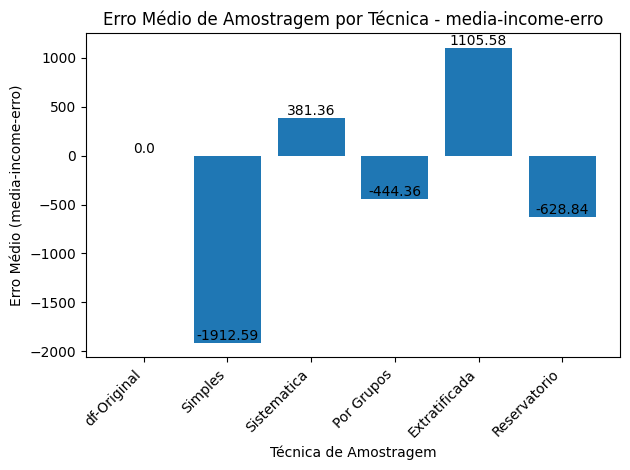

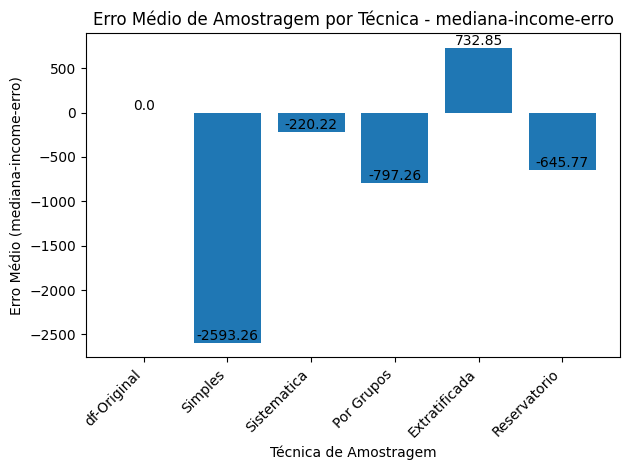

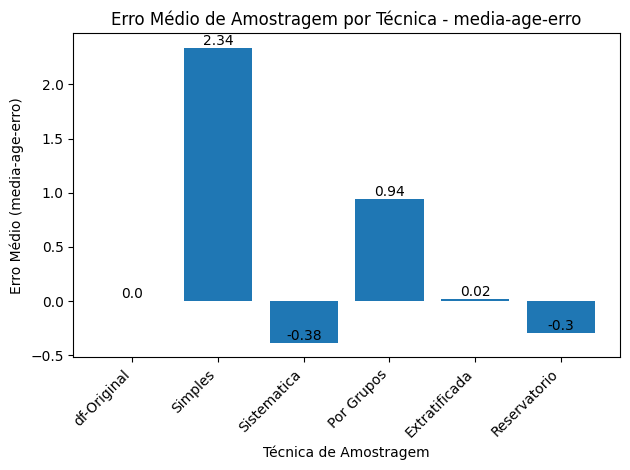

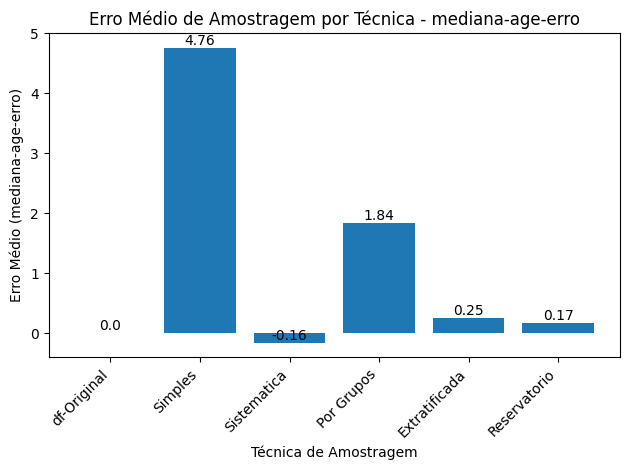

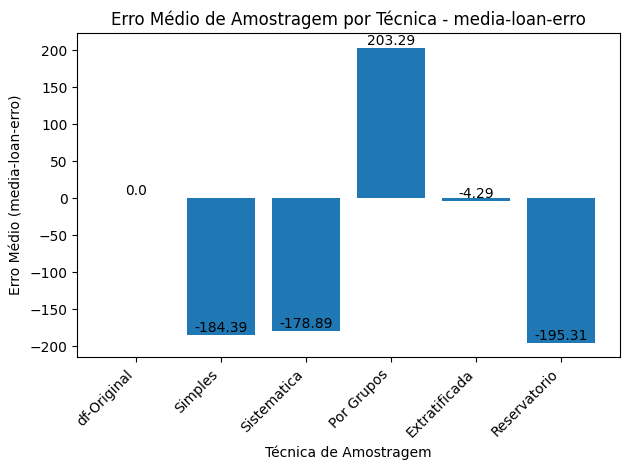

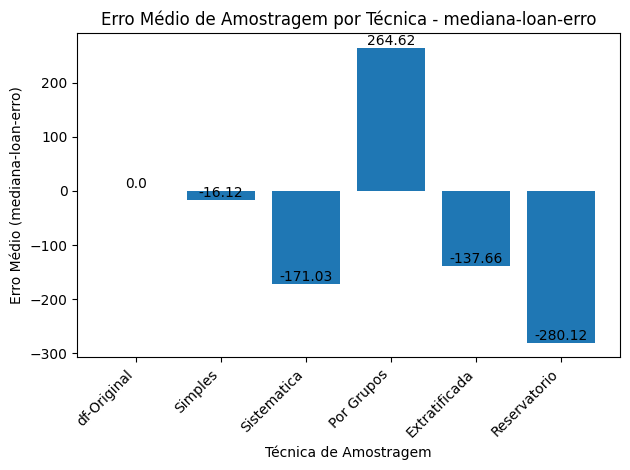

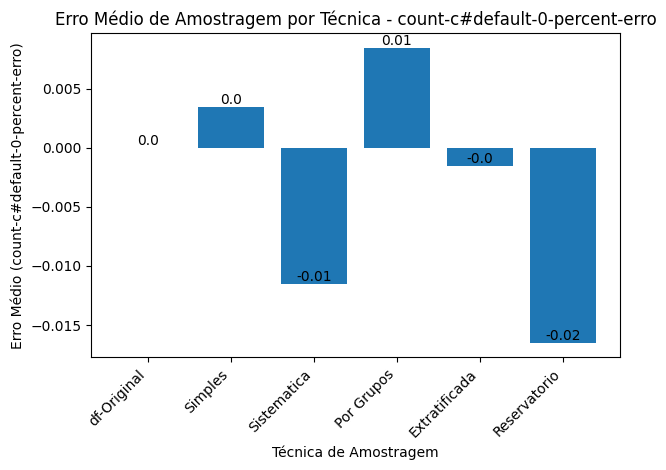

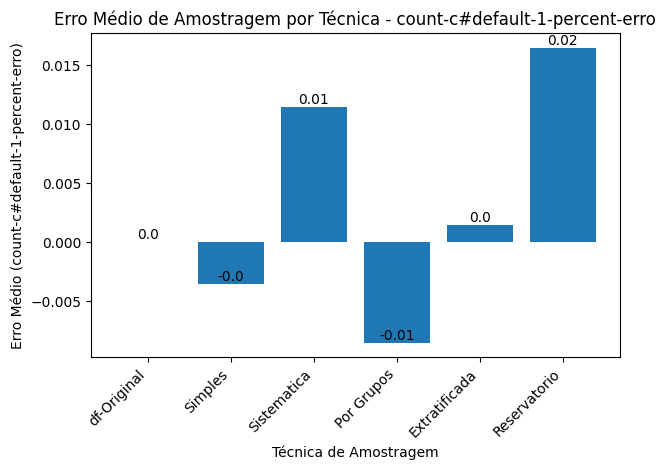

In [66]:

# Configurar o tamanho do gráfico
plt.figure(figsize=(12, 10))

# Lista de colunas para plotar
colunas_para_plotar = ['media-income-erro', 'mediana-income-erro', 'media-age-erro', 'mediana-age-erro',
                       'media-loan-erro', 'mediana-loan-erro', 'count-c#default-0-percent-erro',
                       'count-c#default-1-percent-erro']

# Loop para plotar gráficos para cada coluna
for coluna in colunas_para_plotar:
    plt.figure()  # Criar uma nova figura para cada gráfico

    # Plotar o gráfico de barras
    bars = plt.bar(df_erro['Tecnica-Amostragem'], df_erro[coluna])

    # Adicionar os rótulos de valor acima das barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), ha='center', va='bottom')

    # Configurações do gráfico
    plt.title(f'Erro Médio de Amostragem por Técnica - {coluna}')
    plt.xlabel('Técnica de Amostragem')
    plt.ylabel(f'Erro Médio ({coluna})')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


<a id='erro'></a>
# <font color="#FA7F08"> 6. Relatório de Análise de Técnicas de Amostragem </font>
<hr color="#F5F5F5" size="1">


### <font color="#FA7F08"> 6.1. Introdução: </font>
<hr color="#F5F5F5" size="1">
No âmbito da análise de dados, fui incumbido de uma tarefa desafiadora: selecionar a melhor técnica de amostragem a ser aplicada em um conjunto de dados. Através de um processo criterioso, explorei e implementei cinco técnicas distintas de amostragem: Simples, Sistemática, Por Grupos, Estratificada e Reservatório. Meu objetivo foi avaliar e comparar essas técnicas com base nos resultados gerados, a fim de identificar a abordagem mais eficaz para a análise.


### <font color="#FA7F08"> 6.2. Metodologia: </font>
<hr color="#F5F5F5" size="1">
Minha jornada começou com um DataFrame (credit_data.csv) contendo dados bancario sobre perfil de cliente, para informar se o cliente pagou ou não sua fatura. Cada técnica de amostragem foi aplicada visando a construção de diferentes conjuntos de dados amostrados. As técnicas selecionadas possuem abordagens distintas, variando de uma seleção aleatória simples a uma abordagem estratificada mais complexa.


### <font color="#FA7F08"> 6.3. Análise dos Resultados: </font>
<hr color="#F5F5F5" size="1">
Após aplicar as técnicas de amostragem, conduzi análises minuciosas dos resultados obtidos. Minhas observações me conduziram à elaboração de uma tabela que resume os erros médios em diferentes métricas para cada técnica. Isso permitiu uma compreensão clara das discrepâncias entre as técnicas de amostragem.



### <font color="#FA7F08"> 6.4. Escolha da melhor Técnica: </font>
<hr color="#F5F5F5" size="1">
Ao realizar uma análise cuidadosa, identifiquei que a técnica "Sistematica" apresentou ligeiramente valores de erro mais próximos de zero em várias colunas. Esse padrão sugere uma tendência de maior precisão nos resultados produzidos por essa técnica. Portanto, com base nas informações disponíveis, a técnica "Sistematica" parece ser a mais adequada para este cenário específico de análise de dados.


### <font color="#FA7F08"> 6.1. Considerações Finais: </font>
<hr color="#F5F5F5" size="1">
É crucial lembrar que a escolha da técnica de amostragem não é uma tarefa isolada. Além dos resultados numéricos, outros fatores podem influenciar a decisão, como a natureza dos dados, os objetivos da análise e as limitações práticas. Nesse sentido, a análise realizada serve como uma orientação valiosa, mas uma avaliação mais abrangente pode ser necessária para decisões mais informadas.



### <font color="#FA7F08"> 6.1. Conclusão: </font>
<hr color="#F5F5F5" size="1">
Como analista de dados, minha exploração e análise das diferentes técnicas de amostragem culminaram em insights que podem orientar a seleção da melhor abordagem para a análise em questão. A técnica "Sistematica" se destacou na busca por precisão, mas a seleção final deve ser pautada em uma abordagem holística, considerando a totalidade do cenário em que os dados estão inseridos.

Este relatório sintetiza minha jornada como analista de dados, explorando e comparando técnicas de amostragem, com o objetivo de tomar decisões embasadas e contribuir para uma análise confiável e precisa dos dados.